In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import matplotlib.pyplot as plt
import oommfc as oc
import random
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='svg'
thickness = 2e-9
cell = (2e-9, 2e-9, 2e-9)
p1 = (-400e-9, -50e-9, -thickness/2)
p2 = (400e-9, 50e-9, thickness/2)
region=df.Region(p1=p1,p2=p2)
mesh = df.Mesh(region=region, cell=cell)
system = mm.System(name='color_mapping')

In [2]:
def initial_state(pos):
    x, y = pos[0], pos[1]
    if ((x+300e-9)**2+y**2)**0.5<20e-9:
        m = (0,0,-1)
    else:
        m = (0, 0, 1)
    return m
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.3)
system.energy = mm.Exchange(A=1e-11)+mm.DMI(D=3.2e-3, crystalclass='Cnv_z')+mm.UniaxialAnisotropy(K=0.8e6, u=(0,0,1))
system.m =  df.Field(mesh, dim=3, value=initial_state, norm=5.8e5)
ad = oc.MinDriver()
ad.drive(system)

Running OOMMF (ExeOOMMFRunner)[2022/09/26 12:36]... (6.9 s)


In [3]:
import micromagneticdata as md
data=md.Data(system.name)
data.info

,drive_number,date,time,driver
0,0,2022-09-26,12:36:18,MinDriver


In [5]:
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.3) + mm.ZhangLi(u=300,beta=0.2)
system.energy = mm.Exchange(A=1e-11)+mm.DMI(D=3.2e-3, crystalclass='Cnv_z')+mm.UniaxialAnisotropy(K=0.8e6, u=(0,0,1))
system.m =data[0][0]
md = oc.TimeDriver()
md.drive(system,t=1e-9,n=50,verbose=2)

Running OOMMF (ExeOOMMFRunner):   0%|          | 0/50 files written [00:00]

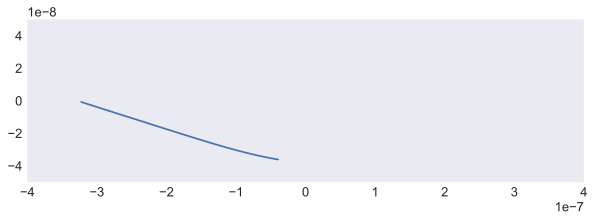

In [6]:
import discretisedfield. tools as dft
def guiding_centre(field):
    q = dft.topological_charge_density(field)
    x = df.Field(field.mesh, dim=1, value=lambda point: point[0])
    y = df.Field(field.mesh, dim=1, value=lambda point: point[1])
    rx = df.integral(x*q*df.dx*df.dy) / df.integral(q*df.dx*df.dy)
    ry = df.integral(y*q*df.dx*df.dy) / df.integral(q*df.dx*df.dy)
    return (rx, ry)
X=[]
Y=[]
for i in range(50):
    x=guiding_centre(data[1][i].plane(z=0))[0]
    y=guiding_centre(data[1][i].plane(z=0))[1]
    X.append(x)
    Y.append(y)
fig=plt.figure(figsize=(10,3),dpi=100)
ax=fig.add_subplot(111)
ax.set_xlim(-400e-9,400e-9)
ax.set_ylim(-50e-9,50e-9)
ax.plot(X,Y)

/var/folders/y6/sqhg18750s90_r_lz_3cn_4h0000gn/T/ipykernel_25798/3970093235.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['-400','-300','-200','-100','0','100','200','300','400'],fontsize=20)
/var/folders/y6/sqhg18750s90_r_lz_3cn_4h0000gn/T/ipykernel_25798/3970093235.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['-50','-25','0','25','50'],fontsize=20)


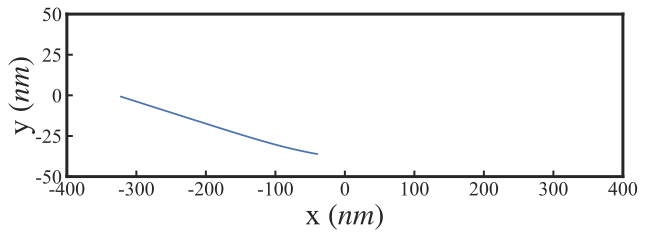

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rcParams
style.use('seaborn-white')
plt.rc('font',family='Times New Roman')
config = {
    "font.family":'Times New Roman',
    "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
fig=plt.figure(figsize=(10,3),dpi=100)
ax=fig.add_subplot(111)
ax.spines['bottom'].set_linewidth(3);###Set the thickness of the bottom axis
ax.spines['left'].set_linewidth(3);####Set the thickness of the left axis
ax.spines['right'].set_linewidth(3);###Set the thickness of the right axis
ax.spines['top'].set_linewidth(3);####Set the thickness of the top axis
ax.tick_params(length=6,width=2,direction='in',labelsize=20)
ax.set_xlabel('x '+r'$(nm)$',fontsize=30)
ax.set_ylabel('y '+r'$(nm)$',fontsize=30,labelpad=0)
ax.set_xticklabels(['-400','-300','-200','-100','0','100','200','300','400'],fontsize=20)
ax.set_yticklabels(['-50','-25','0','25','50'],fontsize=20)
ax.set_xlim(-400e-9,400e-9)
ax.set_ylim(-50e-9,50e-9)
ax.plot(X,Y)

Color mapping of cmap in the form of scatter graph

/var/folders/y6/sqhg18750s90_r_lz_3cn_4h0000gn/T/ipykernel_25798/2587813455.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['-400','-300','-200','-100','0','100','200','300','400'],fontsize=20)
/var/folders/y6/sqhg18750s90_r_lz_3cn_4h0000gn/T/ipykernel_25798/2587813455.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['-50','-25','0','25','50'],fontsize=20)
/var/folders/y6/sqhg18750s90_r_lz_3cn_4h0000gn/T/ipykernel_25798/2587813455.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.colorbar(mappable, ax=ax, label='$t$'+' '+r'$(ns)$').set_ticklabels(['0','0.2','0.4','0.6','0.8','1.0'])


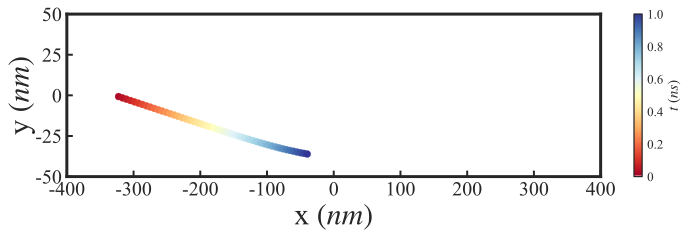

In [30]:
fig=plt.figure(figsize=(12,3),dpi=100)
ax=fig.add_subplot(111)
ax.spines['bottom'].set_linewidth(3);###Set the thickness of the bottom axis
ax.spines['left'].set_linewidth(3);####Set the thickness of the left axis
ax.spines['right'].set_linewidth(3);###Set the thickness of the right axis
ax.spines['top'].set_linewidth(3);####Set the thickness of the top axis
ax.tick_params(length=6,width=2,direction='in',labelsize=20)
ax.set_xlabel('x '+r'$(nm)$',fontsize=30)
ax.set_ylabel('y '+r'$(nm)$',fontsize=30,labelpad=0)
ax.set_xticklabels(['-400','-300','-200','-100','0','100','200','300','400'],fontsize=20)
ax.set_yticklabels(['-50','-25','0','25','50'],fontsize=20)
ax.set_xlim(-400e-9,400e-9)
ax.set_ylim(-50e-9,50e-9)
# colormap
cm = plt.cm.get_cmap('RdYlBu')

# 利用ax畫散佈圖
mappable = ax.scatter(X, Y, c=data[1].table.data['t'], vmin=0, vmax=1e-9, s=50, cmap=cm)

# colorbar
fig.colorbar(mappable, ax=ax, label='$t$'+' '+r'$(ns)$').set_ticklabels(['0','0.2','0.4','0.6','0.8','1.0'])

